<a href="https://colab.research.google.com/github/Reshma-V-R/Currency-Recognition-Using-CNN/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp '/content/drive/MyDrive/currency_recognition.zip' '/content/'

In [ ]:
!unzip '/content/currency_recognition.zip'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing import image

In [ ]:
dataset_path='/content/currency_recognition'

In [ ]:
epochs=10
image_size=(150,150)
batch_size=32

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
training_generator=train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 4681 images belonging to 3 classes.


In [ ]:
validation_generator=train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1170 images belonging to 3 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(image_size[0],image_size[1],3)
))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(training_generator,
                  steps_per_epoch=training_generator.samples//batch_size,
                  validation_data=validation_generator,
                  validation_steps=validation_generator.samples//batch_size,
                  epochs=epochs)

Epoch 1/10
146/146 [==============================] - 35s 212ms/step - loss: 1.2947 - accuracy: 0.7655 - val_loss: 0.2922 - val_accuracy: 0.9002
Epoch 2/10
146/146 [==============================] - 27s 182ms/step - loss: 0.1903 - accuracy: 0.9337 - val_loss: 0.1955 - val_accuracy: 0.9271
Epoch 3/10
146/146 [==============================] - 26s 177ms/step - loss: 0.0920 - accuracy: 0.9753 - val_loss: 0.1790 - val_accuracy: 0.9227
Epoch 4/10
146/146 [==============================] - 26s 181ms/step - loss: 0.0496 - accuracy: 0.9890 - val_loss: 0.1425 - val_accuracy: 0.9505
Epoch 5/10
146/146 [==============================] - 26s 179ms/step - loss: 0.0249 - accuracy: 0.9974 - val_loss: 0.1554 - val_accuracy: 0.9418
Epoch 6/10
146/146 [==============================] - 26s 180ms/step - loss: 0.0224 - accuracy: 0.9963 - val_loss: 0.1413 - val_accuracy: 0.9453
Epoch 7/10
146/146 [==============================] - 26s 181ms/step - loss: 0.0175 - accuracy: 0.9974 - val_loss: 0.1505 - val_ac

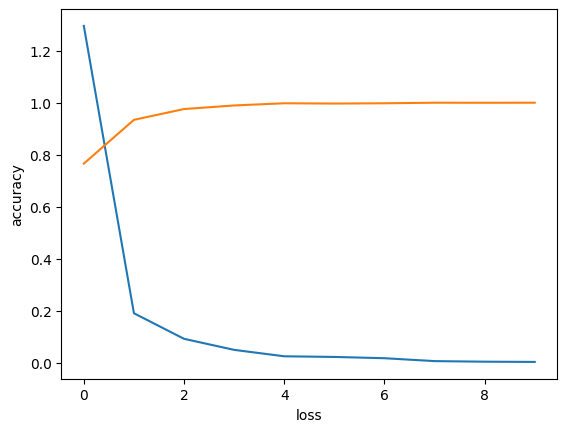

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('loss')
plt.show()

In [ ]:
model.save('currency_recognition_model.h5')

In [ ]:
def predict_image(image_path):
  img=image.load_img(image_path,target_size=image_size)
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  img/=255.0
  prediction=model.predict(img)
  predicted_index=np.argmax(prediction)
  if predicted_index==0:
      return "India"
  elif predicted_index==1:
      return "Pakistan"
  elif predicted_index==2:
      return "Thailand"
  else:
      return "Unknown"

In [ ]:
output=predict_image('/content/rs200.jpeg')
print(output)

1/1 [==============================] - 0s 177ms/step
India


In [ ]:
output=predict_image('/content/thai20.jpeg')
print(output)

1/1 [==============================] - 0s 83ms/step
Thailand


In [ ]:
output=predict_image('/content/pak5000.jpeg')
print(output)

1/1 [==============================] - 0s 182ms/step
Pakistan


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract


In [ ]:
!pip install opencv-python-headless


Predicted denomination: 100


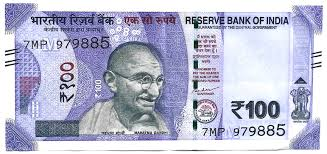

In [ ]:
import cv2
import pytesseract
image=cv2.imread('/content/rs100.jpeg')
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
text=pytesseract.image_to_string(gray)
if '100' in text:
    denomination='100'
elif '200' in text:
    denomination='200'
elif '50' in text:
    denomination='50'
elif '20' in text:
    denomination='20'
elif '10' in text:
    denomination='10'
if denomination:
    print("Predicted denomination:",denomination)
else:
    print("Denomination not detected.")
from google.colab.patches import cv2_imshow
cv2_imshow(image)


Predicted denomination: 50


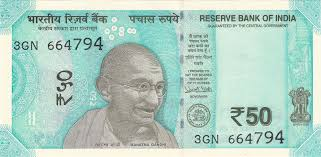

In [ ]:
image=cv2.imread('/content/rs50.jpeg')
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
text=pytesseract.image_to_string(gray)
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
custom_config = r'-l eng --oem 1 --psm 6'
text = pytesseract.image_to_string(gray, config=custom_config)
if '100' in text:
    denomination='100'
elif '200' in text:
    denomination='200'
elif '50' in text:
    denomination='50'
elif '20' in text:
    denomination='20'
elif '10' in text:
    denomination='10'
if denomination:
    print("Predicted denomination:",denomination)
else:
    print("Denomination not detected.")
from google.colab.patches import cv2_imshow
cv2_imshow(image)



Predicted denomination: 500


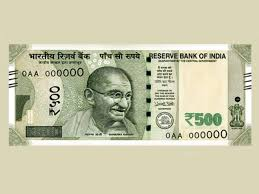

In [ ]:
image=cv2.imread('/content/rs500(1).jpeg')
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
text=pytesseract.image_to_string(gray)
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
custom_config = r'-l eng --oem 1 --psm 6'
text = pytesseract.image_to_string(gray, config=custom_config)
if '100' in text:
    denomination='100'
elif '200' in text:
    denomination='200'
elif '500' in text:
    denomination='500'
elif '50' in text:
    denomination='50'
elif '20' in text:
    denomination='20'
elif '10' in text:
    denomination='10'
if denomination:
    print("Predicted denomination:",denomination)
else:
    print("Denomination not detected.")
from google.colab.patches import cv2_imshow
cv2_imshow(image)

Predicted denomination: 20


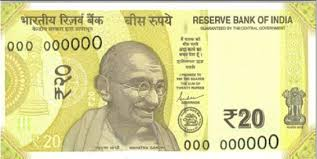

In [ ]:
image=cv2.imread('/content/rs20.jpeg')
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
text=pytesseract.image_to_string(gray)
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
custom_config = r'-l eng --oem 1 --psm 6'
text = pytesseract.image_to_string(gray, config=custom_config)
if '100' in text:
    denomination='100'
elif '200' in text:
    denomination='200'
elif '500' in text:
    denomination='500'
elif '50' in text:
    denomination='50'
elif '20' in text:
    denomination='20'
elif '10' in text:
    denomination='10'
if denomination:
    print("Predicted denomination:",denomination)
else:
    print("Denomination not detected.")
from google.colab.patches import cv2_imshow
cv2_imshow(image)

Predicted denomination: 200


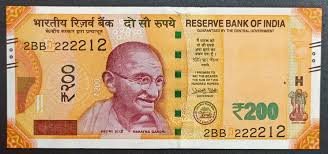

In [ ]:
image=cv2.imread('/content/200rs.jpeg')
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
text=pytesseract.image_to_string(gray)
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
custom_config = r'-l eng --oem 1 --psm 6'
text = pytesseract.image_to_string(gray, config=custom_config)
if '100' in text:
    denomination='100'
elif '200' in text:
    denomination='200'
elif '500' in text:
    denomination='500'
elif '50' in text:
    denomination='50'
elif '20' in text:
    denomination='20'
elif '10' in text:
    denomination='10'
if denomination:
    print("Predicted denomination:",denomination)
else:
    print("Denomination not detected.")
from google.colab.patches import cv2_imshow
cv2_imshow(image)